In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import roc_curve, auc, roc_auc_score

rfont = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rfont)
plt.rcParams["legend.labelspacing"] = 0.001
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [2]:
LOGS_DIR = 'C:\\Users\\Alberto\\Desktop\\uni_tmp\\ADL\\STACIE\\flux_prediction\\logs\\'

precision, recall, f1_score, support

In [3]:
df1 = pd.read_csv(LOGS_DIR+'class_report_log-test_log.csv')
df2 = pd.read_csv(LOGS_DIR+'conf_matrix_log-test_log.csv')
df3 = pd.read_csv(LOGS_DIR+'eval_tgt_prob_log-test_log.csv')
df4 = pd.read_csv(LOGS_DIR+'loss_score_epoch_log-test_log.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Alberto\\Desktop\\uni_tmp\\ADL\\STACIE\\flux_prediction\\logs\\class_report_log-test_log.csv'

In [11]:
df1

,0,1,accuracy,macro avg,weighted avg
0,0.829769,0.550149,0.000000,0.689959,0.725423
1,0.616649,0.787499,0.000000,0.702074,0.680405
2,0.707508,0.647767,0.680405,0.677637,0.685214
3,25611.000000,15247.000000,40858.000000,40858.000000,40858.000000


Best run based on f1 score macro average

In [104]:
n_class = 5
n_runs = 3
bert_str = 'bert'
dframes = dict()
f1_macro_avg = np.zeros(n_runs)
for i in range(n_runs):
    run_idx = i+1
    run_name = 'run'+str(run_idx).zfill(2)+f'-{n_class}l-{bert_str}'
    dframes[run_name] = pd.read_csv(LOGS_DIR+f'class_report_{run_name}_log.csv')
    f1_macro_avg[i] = dframes[run_name]['macro avg'][2]

In [105]:
best_run = np.argmax(f1_macro_avg)
print(f1_macro_avg, 'run id:', str(best_run+1).zfill(2))

[0.38928427 0.39078074 0.3878446 ] run id: 02


In [106]:
best_df = pd.read_csv(LOGS_DIR+'class_report_run02-5l-bert_log.csv')

In [107]:
best_df

,0,1,2,3,4,accuracy,macro avg,weighted avg
0,0.799325,0.466974,0.342331,0.496198,0.0,0.000000,0.420965,0.653862
1,0.749014,0.522861,0.412764,0.228546,0.0,0.000000,0.382637,0.636571
2,0.773352,0.493340,0.374262,0.312950,0.0,0.636571,0.390781,0.642485
3,25611.000000,6977.000000,7067.000000,1142.000000,61.0,40858.000000,40858.000000,40858.000000


In [57]:
best_df_cmat = pd.read_csv(LOGS_DIR+'conf_matrix_run01-3l_log.csv')

Loads confusion matrix and plots it

In [3]:
df_cmat_2l = pd.read_csv(LOGS_DIR+'conf_matrix_run06-2l_log.csv')
df_cmat_3l = pd.read_csv(LOGS_DIR+'conf_matrix_run01-3l_log.csv')
df_cmat_5l = pd.read_csv(LOGS_DIR+'conf_matrix_run01-5l_log.csv')

df_cmat_bert_2l = pd.read_csv(LOGS_DIR+'conf_matrix_run02-2l-bert_log.csv')
df_cmat_bert_3l = pd.read_csv(LOGS_DIR+'conf_matrix_run02-3l-bert_log.csv')
df_cmat_bert_5l = pd.read_csv(LOGS_DIR+'conf_matrix_run02-5l-bert_log.csv')

In [12]:
plot_folder = 'plots'

n_class = 3
run_id = 'run02-3l-bert'
best_df_cmat = df_cmat_bert_3l

plot_path = os.path.join(os.getcwd(), plot_folder, run_id+'_conf_matrix_v3.png')

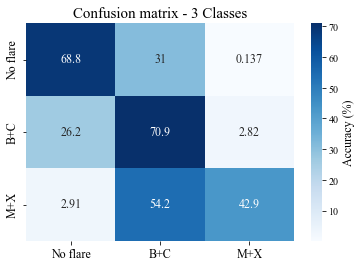

In [13]:
cmat = []

for i in range(n_class):
    
    cmat.append(ast.literal_eval(best_df_cmat['norm_cmt'][i]))
    
cmat = np.array(cmat)*100

if n_class == 5:
    cmat_new = np.copy(cmat)
    cmat_new[:, 1], cmat_new[:, 2] =  cmat[:, 2], cmat[:, 1]
    
    cmat = np.copy(cmat_new)
    cmat_new[1, :], cmat_new[2, :] = cmat[2, :], cmat[1, :]
else:
    cmat_new = cmat

#fig = plt.figure(figsize = (10,7))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(f'Confusion matrix - {n_class} Classes', fontsize = 15)


ax = sns.heatmap(cmat_new, cmap="Blues", annot=True,
                 fmt='.3g', #only for run02-5l-bert
                 cbar_kws={'label': 'Accuracy (%)'}, annot_kws={"size": 12})

ax.set_xlabel('')
ax.set_ylabel('')

if n_class == 5:
    #df_cm = pd.DataFrame(cmat, index = ['No flare', 'C', 'B', 'M', 'X'],
    #                     columns = ['No flare', 'C', 'B', 'M', 'X'])
    ax.xaxis.set_ticklabels(['No flare', 'B', 'C', 'M', 'X'], size=12)
    ax.yaxis.set_ticklabels(['No flare', 'B', 'C', 'M', 'X'], size=12)
elif n_class == 3:
    #df_cm = pd.DataFrame(cmat, index = ['No flare', 'C+B', 'M+X'],
    #                     columns = ['No flare', 'C+B', 'M+X'])
    ax.xaxis.set_ticklabels(['No flare', 'B+C', 'M+X'], size=12)
    ax.yaxis.set_ticklabels(['No flare', 'B+C', 'M+X'], size=12)
elif n_class == 2:
    #df_cm = pd.DataFrame(cmat, index = ['No flare', 'Flare'],
    #                     columns = ['No flare', 'Flare'])
    ax.xaxis.set_ticklabels(['No Flare','Flare'], size=12)
    ax.yaxis.set_ticklabels(['No Flare','Flare'], size=12)
    
ax.figure.axes[-1].yaxis.label.set_size(12)

plt.savefig(plot_path)

ROC curve

In [4]:
df_roc_2l = pd.read_csv(LOGS_DIR+'eval_tgt_prob_run06-2l_log.csv')
df_roc_bert_2l = pd.read_csv(LOGS_DIR+'eval_tgt_prob_run02-2l-bert_log.csv')

In [7]:
plot_folder = 'plots'

current_df = df_roc_bert_2l
run_id = 'run02-2l-bert'

plot_path2 = os.path.join(os.getcwd(), plot_folder, run_id+'_roc_v2.png')
plot_path3 = os.path.join(os.getcwd(), plot_folder, run_id+'_roc_xaxis')
plot_path4 = os.path.join(os.getcwd(), plot_folder, run_id+'_roc_yaxis')


tgt_list = []

for row in current_df['eval_target']:
    #print(type(row))
    #tgt.append(ast.literal_eval(row))
    tgt_list.append(row)
    
prob_list = []
for row in current_df['eval_out_prob']:
    prob_list.append(ast.literal_eval(row))
    
prob_array = np.array(prob_list)

ROC curve (area = 0.80)


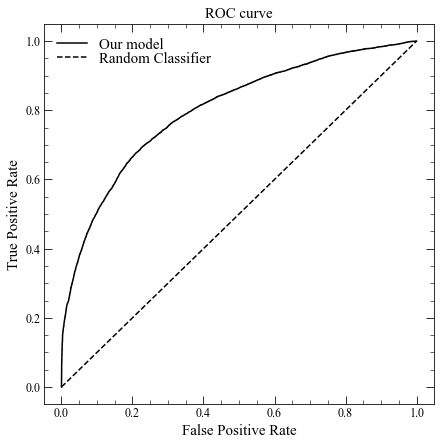

In [8]:
rfont = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rfont)
plt.rcParams["legend.labelspacing"] = 0.001
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

fpr = dict()
tpr = dict()
roc_auc = dict()
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
#lw = 2

#only one roc curve
#print(tgt_list)
#prob_array = np.array(prob_list)
current_y_score = prob_array[:, 1] #according to documentation y_score has to be probabilities of the positive class
fpr[0], tpr[0], _ = roc_curve(tgt_list, current_y_score)
roc_auc[0] = auc(fpr[0], tpr[0])
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(tgt_list).ravel(), current_y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

np.save(plot_path3, fpr[0])
np.save(plot_path4, tpr[0])

ax.plot(fpr[0], tpr[0], color = 'black', #lw=2, 
        #label="ROC curve (area = %0.2f)" % roc_auc[0]
        label='Our model')

ax.plot([0, 1], [0, 1], color = 'black', ls = '--', label = 'Random Classifier')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
ax.set_title('ROC curve', fontsize = 15)
ax.set_ylabel('True Positive Rate', fontsize = 15)
ax.set_xlabel('False Positive Rate', fontsize = 15)

ax.minorticks_on()
ax.tick_params(which = 'both', bottom = True, top = True, left = True, right = True)
ax.tick_params(which = 'major', length = 8, direction = 'in', labelsize = 12)
ax.tick_params(which = 'minor', length = 4, direction = 'in', labelsize = 12)
ax.legend(frameon = False, fontsize = 15)

print("ROC curve (area = %0.2f)" % roc_auc[0])
#plt.legend(loc="lower right")

plt.savefig(plot_path2)